<a href="https://colab.research.google.com/github/guigomes91/python-data-analytcs/blob/master/QuarentenaDados_Filmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

Nesse trecho vamos mostrar que o notebook interpreta/roda código em python

In [37]:
print("Guilherme Gomes")
print("Paulo")

Guilherme Gomes
Paulo


In [0]:
nome_do_filme = "Totoro, o filme"

In [39]:
print(nome_do_filme)

Totoro, o filme


# Lendo os dados do MovieLens

Vamos carregar os arquios de amostras do movieLens. Você pode baixar e utilizar uma versão mais recente se preferir.

In [0]:
import pandas as pd

In [41]:
filmes = pd.read_csv("https://raw.githubusercontent.com/guigomes91/python-data-analytcs/master/movies.csv")
# filmes é um DataFrame
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Exemplos de como ler a documentação dentro do próprio notebook

In [0]:
# Lendo a documentação de um método/atributo
?filmes.head

In [0]:
# Lendo a documentação do tipo (docstring)
?filmes

Agora sim vamos análisar as notas do arquivo


In [44]:
avaliacoes = pd.read_csv("https://github.com/guigomes91/python-data-analytcs/blob/master/ratings.csv?raw=true")
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [45]:
# Formato do arquivo (linhas, colunas)
avaliacoes.shape

(100836, 4)

In [46]:
# Tamanho do arquivo em linhas
len(avaliacoes)

100836

In [47]:
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [48]:
avaliacoes_do_filme_1 = avaliacoes.query("filmeId==1")
avaliacoes_do_filme_1.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [49]:
avaliacoes_do_filme_1.describe()

,usuarioId,filmeId,nota,momento
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


In [50]:
avaliacoes_do_filme_1["nota"]

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: nota, Length: 215, dtype: float64

In [51]:
# Avaliação analitica do filme
avaliacoes.query("filmeId==1").describe()

,usuarioId,filmeId,nota,momento
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


In [52]:
# Só a média com filmeId seja 1
avaliacoes_do_filme_1.mean()

usuarioId    3.065302e+02
filmeId      1.000000e+00
nota         3.920930e+00
momento      1.129835e+09
dtype: float64

In [53]:
# Só o campo nota e a média com filmeId seja 1 (Não é recomendado usar assim)
avaliacoes_do_filme_1["nota"].mean()

3.9209302325581397

In [100]:
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [55]:
notas_medias_por_filme

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [0]:
# não quero correr o risco de amanhã os filmes não estarem em quantidade exata e ter que alterar o meu código
#filmes["nota_media"] = notas_medias_por_filme
#filmes.head()

# Desafio 1

Encontre os 18 filmes que não receberam nenhuma nota (avaliação)

In [105]:
# DataFrame
filmes.head(18)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [106]:
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [114]:
#Desafio 1
filmes_com_media.query("nota == 'NaN'").head(18)

,filmeId,titulo,generos,nota
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


## Desafio 2

Mudar o nome da coluna nota para média após o join

In [118]:
#Desafio 2
filmes_com_media.columns = ["filmeId", "titulo", "generos", "media"]
filmes_com_media.sort_values("media", ascending=False).head(5)

,filmeId,titulo,generos,media
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0


## Desafio 3

Colocar o número de avaliações por filme, isto é, não só a média mas o Total de votos por filme.
 

In [131]:
votos_por_filme = avaliacoes.groupby("filmeId")["filmeId"].count()
votos_por_filme.columns = ["filmeId", "Total"]
votos_por_filme
#filmes_com_media_e_votos = filmes_com_media.join(votos_por_filme, on="filmeId")
#filmes_com_media_e_votos.head()


filmeId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: filmeId, Length: 9724, dtype: int64

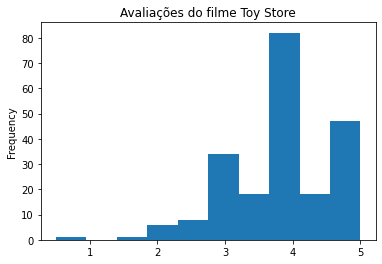

In [72]:
import matplotlib.pyplot as plt

avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist', 
                                              title="Avaliações do filme Toy Store")
#plt.title("Avaliações do filme Toy Store")
plt.show()

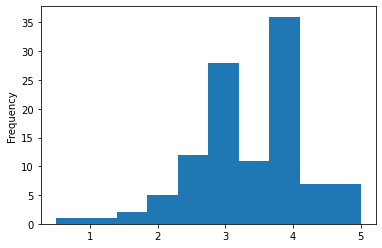

In [69]:
avaliacoes.query("filmeId == 2")["nota"].plot(kind='hist')

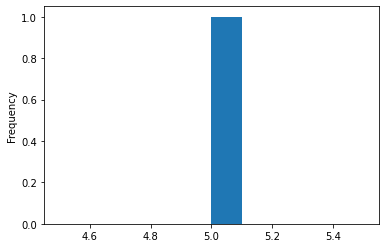

In [70]:
avaliacoes.query("filmeId == 102084")["nota"].plot(kind='hist')

# Desafio 4

Arredondar as médias para duas casas decimais

# Desafio 5
Descobrir os generos dos filmes (quais são eles, únicos)
Esse é mais complicado

# Desafio 6
Contar o número de aparições de cada genero

# Desafio 7
Plotar o gráfico de aparições por genero. Pode ser um gráfico de tipo igual a barra